<a href="https://colab.research.google.com/github/VladislavBuzanov/ml/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import random
import math
import pylab as pl
import numpy as np
from matplotlib.colors import ListedColormap

In [47]:

def generateData(numberOfClassEl, numberOfClasses):
    data = []
    for classNum in range(numberOfClasses):
        centerX, centerY = random.random() * 5.0, random.random() * 5.0
        for rowNum in range(numberOfClassEl):
            data.append([[random.gauss(centerX, 0.5), random.gauss(centerY, 0.5)], classNum])
    return data

In [48]:

def showData(nClasses, nItemsInClass, data):
    trainData = data
    classColormap = ListedColormap(['#FF0000', '#00FF00', '#000000'])
    pl.scatter([trainData[i][0][0] for i in range(len(trainData))],
               [trainData[i][0][1] for i in range(len(trainData))],
               c=[trainData[i][1] for i in range(len(trainData))],
               cmap=classColormap)
    pl.show()

In [49]:

def classifyKNN(trainData, testData, k, numberOfClasses):
    def dist(a, b):
        return math.sqrt((a[0] - b[0]) ** 2 + (a[1] - b[1]) ** 2)

    testLabels = []
    for testPoint in testData:
        testDist = [[dist(testPoint, trainData[i][0]), trainData[i][1]] for i in range(len(trainData))]
        stat = [0 for i in range(numberOfClasses)]
        for d in sorted(testDist)[0:k]:
            stat[d[1]] += 1
        testLabels.append(sorted(zip(stat, range(numberOfClasses)), reverse=True)[0][1])
    return testLabels

In [54]:

def showDataOnClass(nClasses, nItemsInClass, k):
    def generateTestMesh(trainData):
        x = []
        y = []
        for i in range(len(trainData)):
            x.append(trainData[i][0][0])
            y.append(trainData[i][0][1])

        x_min = min(x)
        x_max = max(x)-min(x)
        y_min = min(y)
        y_max = max(y)-min(y)
        new_X, new_Y = np.meshgrid(np.arange(x_min, x_max),
                                   np.arange(y_min, y_max))
        return [new_X, new_Y]

    trainData = generateData(nItemsInClass, nClasses)
    testMesh = generateTestMesh(trainData)
    testMeshLabels = classifyKNN(trainData, zip(testMesh[0].ravel(), testMesh[1].ravel()), k, nClasses)
    classColormap = ListedColormap(['#FF0000', '#00FF00', '#000000'])
    testColormap = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAAA'])

    showData(4,20, trainData)

    pl.pcolormesh(testMesh[0],
                  testMesh[1],
                  np.asarray(testMeshLabels).reshape(testMesh[0].shape),
                  cmap=testColormap)
    pl.scatter([trainData[i][0][0] for i in range(len(trainData))],
               [trainData[i][0][1] for i in range(len(trainData))],
               c=[trainData[i][1] for i in range(len(trainData))],
               cmap=classColormap)
    pl.show()

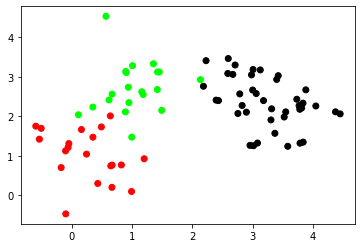

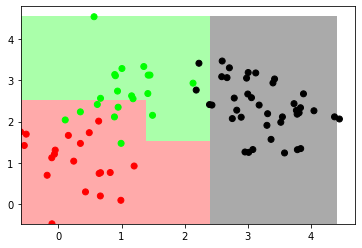

In [65]:
showDataOnClass(4, 20, 4)